In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import seaborn as sns

In [2]:
import geopandas as gpd

In [3]:
for layername in fiona.listlayers('KVA.gdb'):
    with fiona.open('KVA.gdb', layer=layername) as src:
        print(layername, len(src))

Anlagen 30
Abfallmenge 30
Stromabgabe 30
Waermeabgabe 30


In [4]:
strom_df = gpd.read_file('KVA.gdb', driver='FileGDB', layer='Stromabgabe')

In [5]:
waerme_df = gpd.read_file('KVA.gdb', driver='FileGDB', layer='Waermeabgabe')

In [6]:
strom_df.head(2)

,Name,id,_2010,_2011,_2012,_2013,_2014,_2015,_2016,_2017,_2018,_2019,_2020,_2021,geometry
0,Buchs (AG),AG_1,45221.0,47105.0,45046.0,42011.0,64247.0,64431.0,68333.0,64348.0,73646.0,73914.0,82067.0,79557.0,None
1,Oftringen,AG_2,46166.0,46181.0,46821.0,45906.0,46689.0,21865.0,46242.0,45827.0,45412.0,47962.0,44494.0,45974.0,None


In [7]:
waerme_df.head(2)

,Name,id,_2010,_2011,_2012,_2013,_2014,_2015,_2016,_2017,_2018,_2019,_2020,_2021,geometry
0,Buchs (AG),AG_1,80154.0,72811.0,75264.0,75693.0,71595.0,74974.0,78704.0,73956.0,73097.0,72141.0,65666.0,69658.0,None
1,Oftringen,AG_2,10448.0,10310.0,14851.0,16462.0,15117.0,18893.0,33975.0,36726.0,34871.0,40660.0,42320.0,47763.0,None


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
waerme_df.dtypes

Name         object
id           object
_2010       float64
_2011       float64
_2012       float64
_2013       float64
_2014       float64
_2015       float64
_2016       float64
_2017       float64
_2018       float64
_2019       float64
_2020       float64
_2021       float64
geometry     object
dtype: object

In [10]:
waerme_df.query("id == 'AG_1'")

,Name,id,_2010,_2011,_2012,_2013,_2014,_2015,_2016,_2017,_2018,_2019,_2020,_2021,geometry
0,Buchs (AG),AG_1,80154.0,72811.0,75264.0,75693.0,71595.0,74974.0,78704.0,73956.0,73097.0,72141.0,65666.0,69658.0,None


In [11]:
len(waerme_df)

30

In [12]:
waerme_df.iloc[1]

Name        Oftringen
id               AG_2
_2010           10448
_2011           10310
_2012           14851
_2013           16462
_2014           15117
_2015           18893
_2016           33975
_2017           36726
_2018           34871
_2019           40660
_2020           42320
_2021           47763
geometry         None
Name: 1, dtype: object

In [13]:
waerme_df.query("id == 'AG_1'")

,Name,id,_2010,_2011,_2012,_2013,_2014,_2015,_2016,_2017,_2018,_2019,_2020,_2021,geometry
0,Buchs (AG),AG_1,80154.0,72811.0,75264.0,75693.0,71595.0,74974.0,78704.0,73956.0,73097.0,72141.0,65666.0,69658.0,None


In [14]:
names = []

In [15]:
names = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [16]:
waerme_df.loc[0]

Name        Buchs (AG)
id                AG_1
_2010            80154
_2011            72811
_2012            75264
_2013            75693
_2014            71595
_2015            74974
_2016            78704
_2017            73956
_2018            73097
_2019            72141
_2020            65666
_2021            69658
geometry          None
Name: 0, dtype: object

In [17]:
waerme_df.loc[0, '_2010']/1000

80.154

In [18]:
values =[]

In [19]:
values = [
    waerme_df.loc[0, '_2010']/1000,
    waerme_df.loc[0, '_2011']/1000,
    waerme_df.loc[0, '_2012']/1000,
    waerme_df.loc[0, '_2013']/1000,
    waerme_df.loc[0, '_2014']/1000,
    waerme_df.loc[0, '_2015']/1000,
    waerme_df.loc[0, '_2016']/1000,
    waerme_df.loc[0, '_2017']/1000,
    waerme_df.loc[0, '_2018']/1000, 
    waerme_df.loc[0, '_2019']/1000,
    waerme_df.loc[0, '_2020']/1000,
    waerme_df.loc[0, '_2021']/1000,
]

In [20]:
values

[80.154,
 72.811,
 75.264,
 75.693,
 71.595,
 74.974,
 78.704,
 73.956,
 73.097,
 72.141,
 65.666,
 69.658]

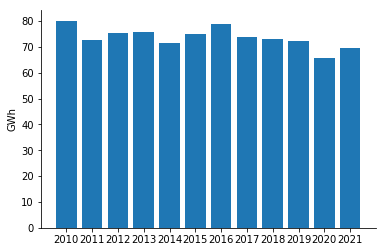

In [21]:
ax = plt.axes()
idvalue = waerme_df.loc[0,'id']

plt.bar(names, values)
plt.xticks(names)
plt.ylabel('GWh')

#Deaktiviert Rahmen oben und rechts
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('waerme_' + str(idvalue) + '.png', dpi=400, bbox_inches='tight',transparent=True)
plt.show()

In [22]:
i=0

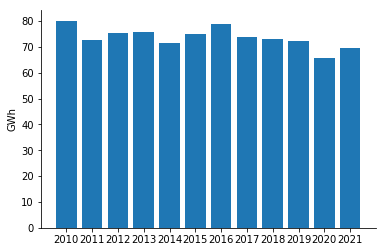

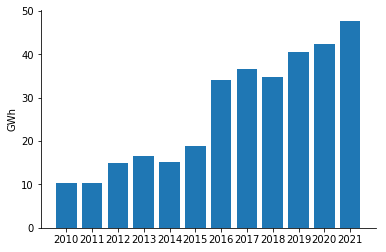

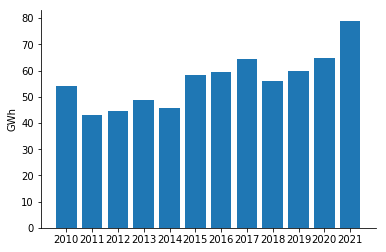

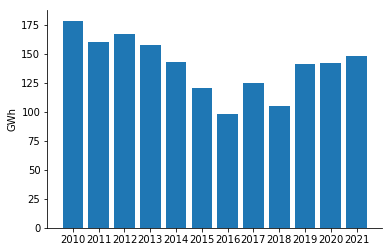

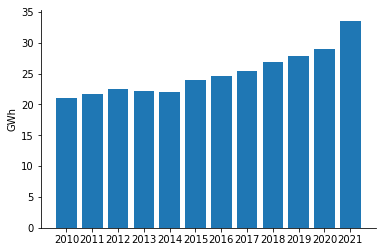

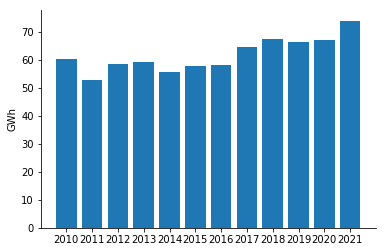

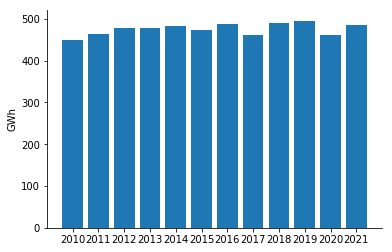

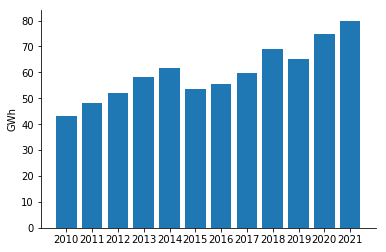

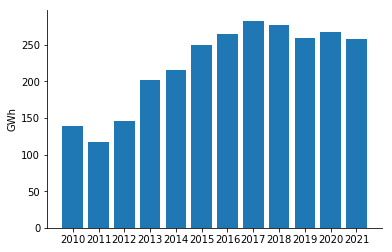

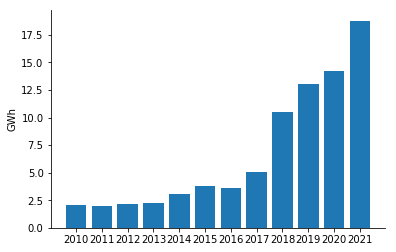

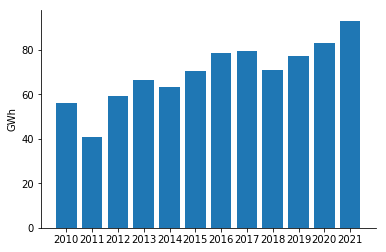

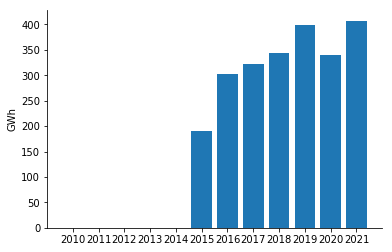

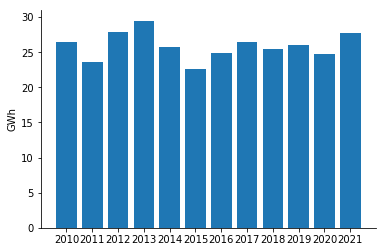

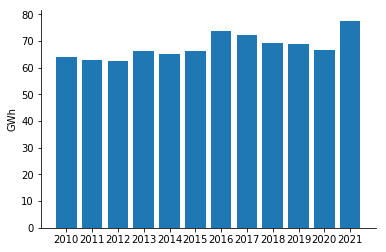

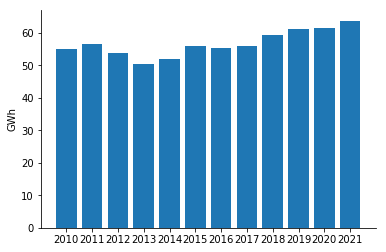

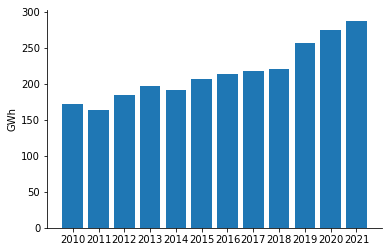

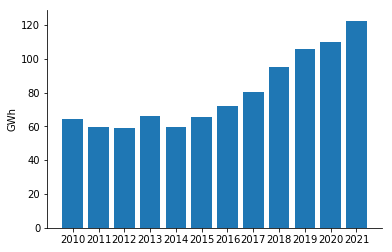

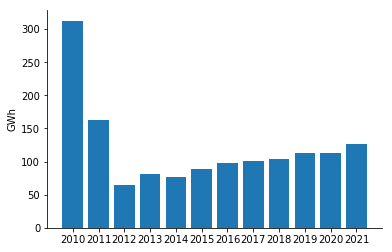

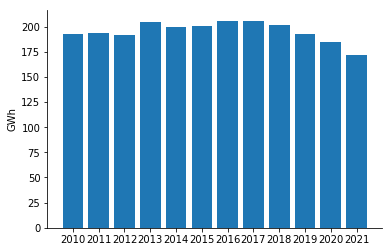

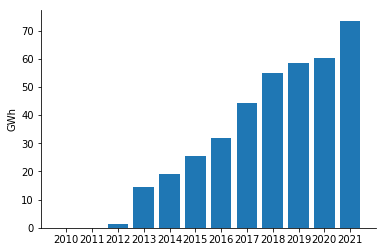

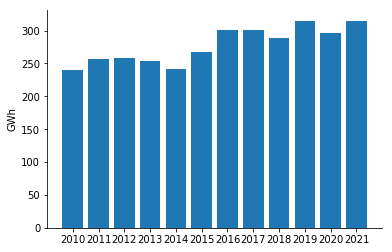

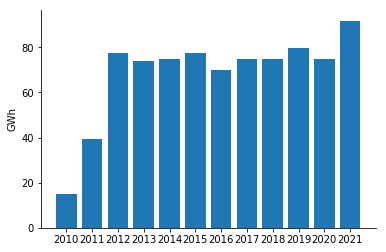

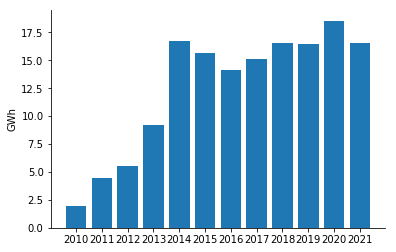

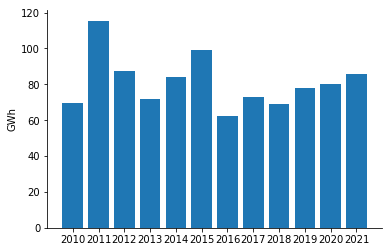

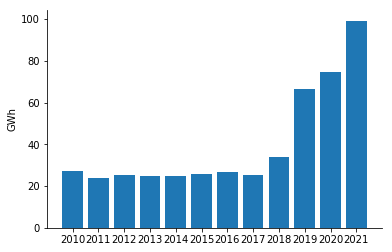

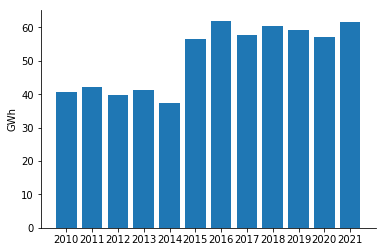

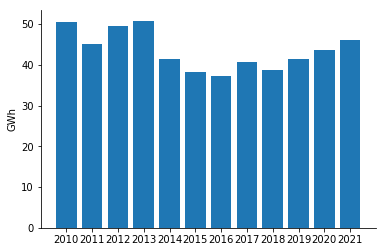

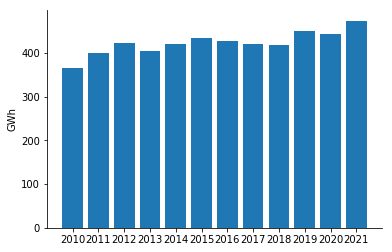

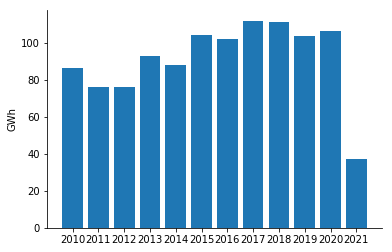

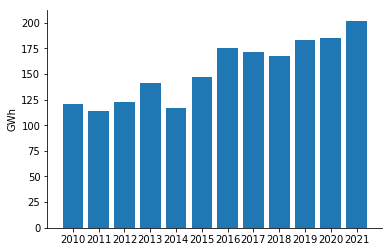

KeyError: 'the label [30] is not in the [index]'

In [23]:
#Diagramme für Wärme
def barchartWaerme(i):

    while i < 31:
        values =[]
        values = [
            waerme_df.loc[i, '_2010']/1000,
            waerme_df.loc[i, '_2011']/1000,
            waerme_df.loc[i, '_2012']/1000,
            waerme_df.loc[i, '_2013']/1000,
            waerme_df.loc[i, '_2014']/1000,
            waerme_df.loc[i, '_2015']/1000,
            waerme_df.loc[i, '_2016']/1000,
            waerme_df.loc[i, '_2017']/1000,
            waerme_df.loc[i, '_2018']/1000,
            waerme_df.loc[i, '_2019']/1000,
            waerme_df.loc[i, '_2020']/1000,
            waerme_df.loc[i, '_2021']/1000,
                ]
        
        idvalue = waerme_df.loc[i,'id']
        
        i = i+1  
        

        ax = plt.axes()
        plt.bar(names, values)
        plt.xticks(names)
        plt.ylabel('GWh')

        #Deaktiviert Rahmen oben und rechts
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


        plt.savefig('waerme_' + str(idvalue) + '.png', dpi=400, bbox_inches='tight',transparent=True)
        plt.show()

        
barchartWaerme(i)


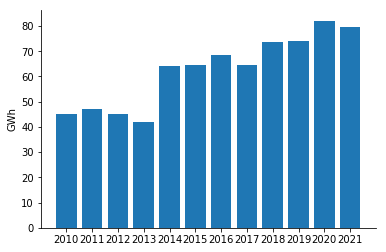

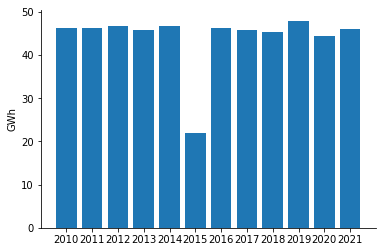

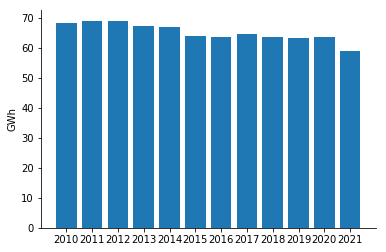

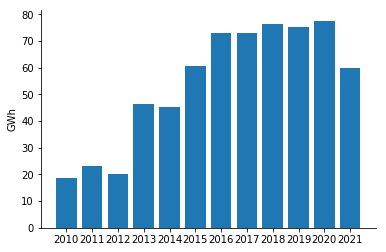

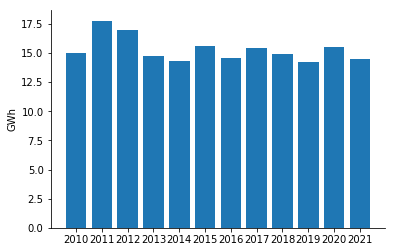

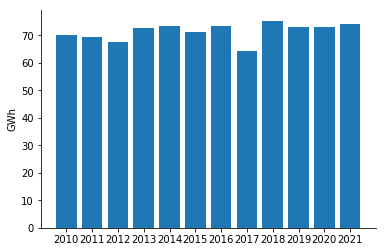

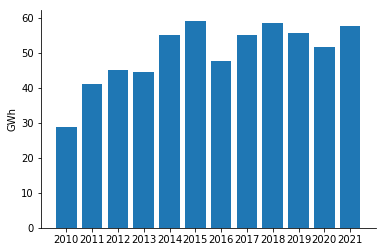

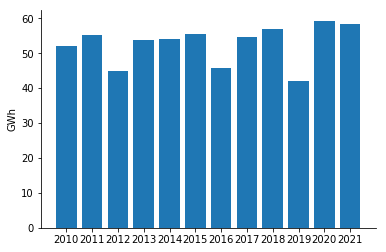

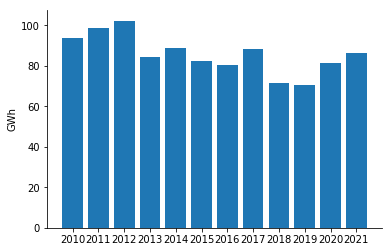

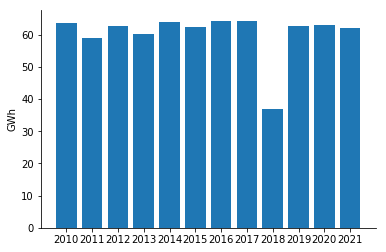

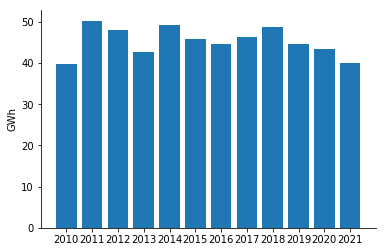

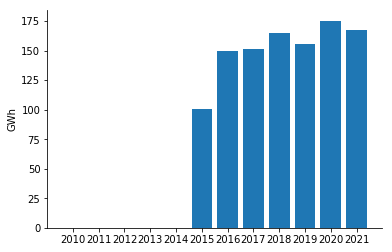

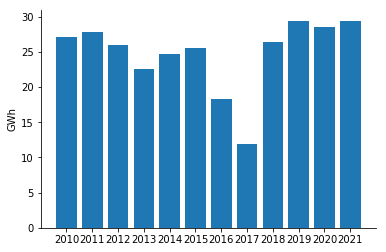

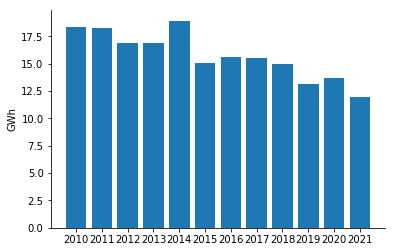

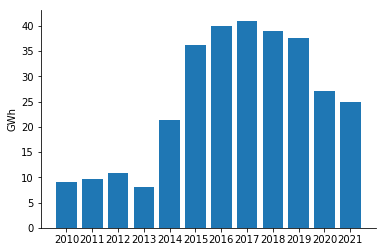

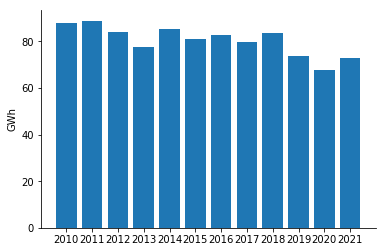

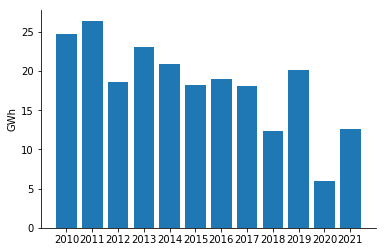

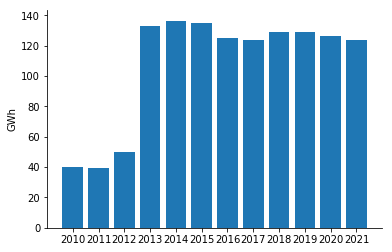

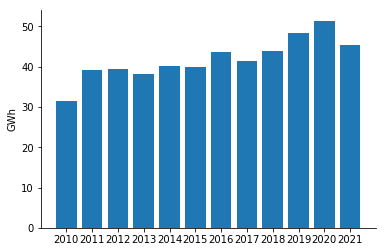

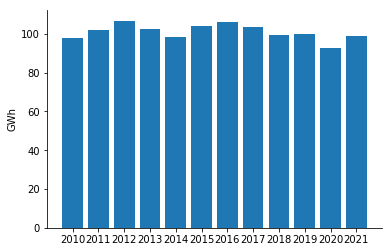

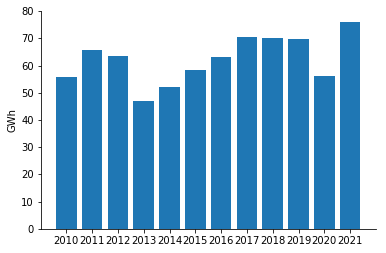

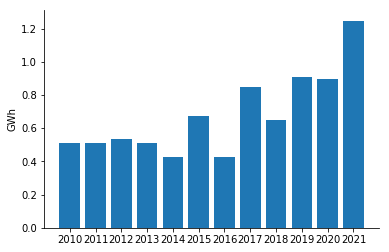

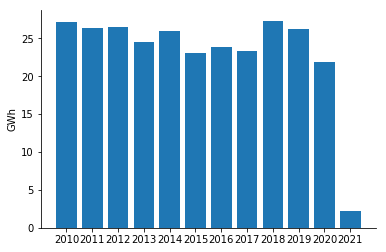

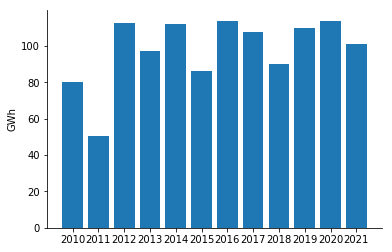

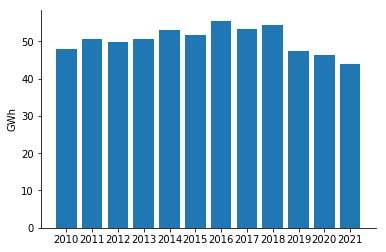

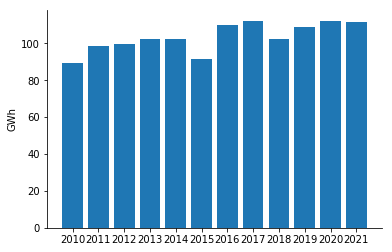

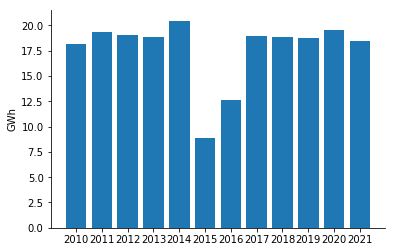

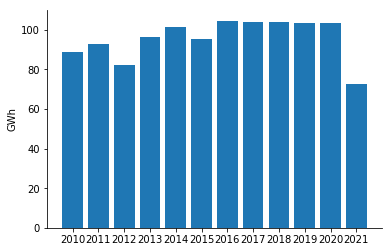

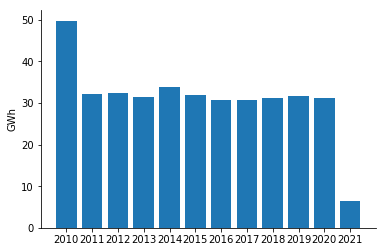

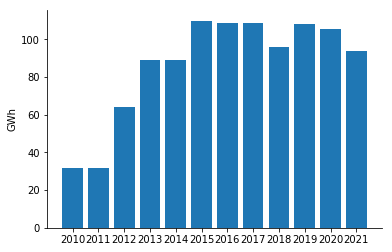

KeyError: 'the label [30] is not in the [index]'

In [24]:
#Diagramme für Strom
def barchartStrom(i):

    while i < 31:
        values =[]
        values = [
            strom_df.loc[i, '_2010']/1000,
            strom_df.loc[i, '_2011']/1000,
            strom_df.loc[i, '_2012']/1000,
            strom_df.loc[i, '_2013']/1000,
            strom_df.loc[i, '_2014']/1000,
            strom_df.loc[i, '_2015']/1000,
            strom_df.loc[i, '_2016']/1000,
            strom_df.loc[i, '_2017']/1000,
            strom_df.loc[i, '_2018']/1000,
            strom_df.loc[i, '_2019']/1000,
            strom_df.loc[i, '_2020']/1000,
            strom_df.loc[i, '_2021']/1000,
                ]
        
        idvalue = strom_df.loc[i,'id']
        
        i = i+1  
        

        ax = plt.axes()
        plt.bar(names, values)
        plt.xticks(names)
        plt.ylabel('GWh')

        #Deaktiviert Rahmen oben und rechts
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


        plt.savefig('strom_' + str(idvalue) + '.png', dpi=400, bbox_inches='tight',transparent=True)
        plt.show()

        
barchartStrom(i)


In [25]:
waerme_df.query("id == 'LU_2'")

,Name,id,_2010,_2011,_2012,_2013,_2014,_2015,_2016,_2017,_2018,_2019,_2020,_2021,geometry
11,Perlen,LU_2,0.0,0.0,0.0,0.0,0.0,190747.0,303065.0,321904.0,344002.0,397794.0,339264.0,407178.0,None


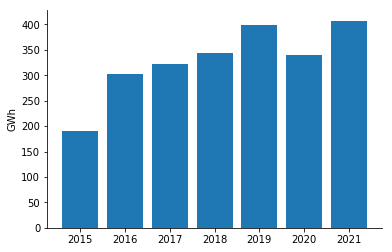

In [26]:
        #Spezialfall Wärme Luzern LU_2
        values =[]
        values = [
            waerme_df.loc[11, '_2015']/1000,
            waerme_df.loc[11, '_2016']/1000,
            waerme_df.loc[11, '_2017']/1000,
            waerme_df.loc[11, '_2018']/1000,
            waerme_df.loc[11, '_2019']/1000,
            waerme_df.loc[11, '_2020']/1000,
            waerme_df.loc[11, '_2021']/1000,
                ]
        
        idvalue = waerme_df.loc[11,'id']
        


        ax = plt.axes()
        plt.bar([2015, 2016, 2017, 2018, 2019, 2020, 2021], values)
        plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021])
        plt.ylabel('GWh')

        #Deaktiviert Rahmen oben und rechts
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


        plt.savefig('waerme_' + str(idvalue) + '.png', dpi=400, bbox_inches='tight',transparent=True)
        plt.show()


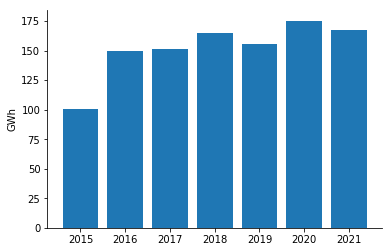

In [27]:
        #Spezialfall Strom Luzern LU_2
        values =[]
        values = [
            strom_df.loc[11, '_2015']/1000,
            strom_df.loc[11, '_2016']/1000,
            strom_df.loc[11, '_2017']/1000,
            strom_df.loc[11, '_2018']/1000,
            strom_df.loc[11, '_2019']/1000,
            strom_df.loc[11, '_2020']/1000,
            strom_df.loc[11, '_2021']/1000,
                ]
        
        idvalue = strom_df.loc[11,'id']        

        ax = plt.axes()
        plt.bar([2015, 2016, 2017, 2018, 2019, 2020, 2021], values)
        plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021])
        plt.ylabel('GWh')

        #Deaktiviert Rahmen oben und rechts
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


        plt.savefig('strom_' + str(idvalue) + '.png', dpi=400, bbox_inches='tight',transparent=True)
        plt.show()
